# SPACEDOS02 HEMERA

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, timezone
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import matplotlib

## Read Logfile

In [2]:
#fto = glob.iglob("./data/*.TXT") # generator, search immediate subdirectories 

fto = '/storage/experiments/2019/09_HEMERA/FLIGHT/FF/DATALOG.TXT' #  File to Open

print (fto)

l=[]
l.extend(range(0,259))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
#df = pd.read_csv(fto, sep=',', header=None, comment='*')#,engine='python' )
df = df.reset_index(drop=True)

/storage/experiments/2019/09_HEMERA/FLIGHT/FF/DATALOG.TXT


## Calculate Flux

Text(0, 0.5, 'Flux [counts per 10 s]')

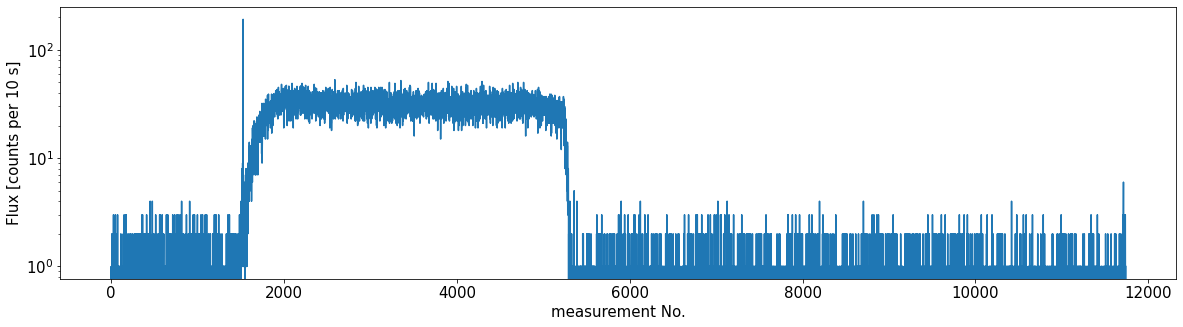

In [3]:
%matplotlib inline

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rc['sum'] = rc.iloc[:,11:255].sum(axis=1)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

rc['sum'].plot()
plt.yscale('log')

plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 10 s]')


(0.04, 10)

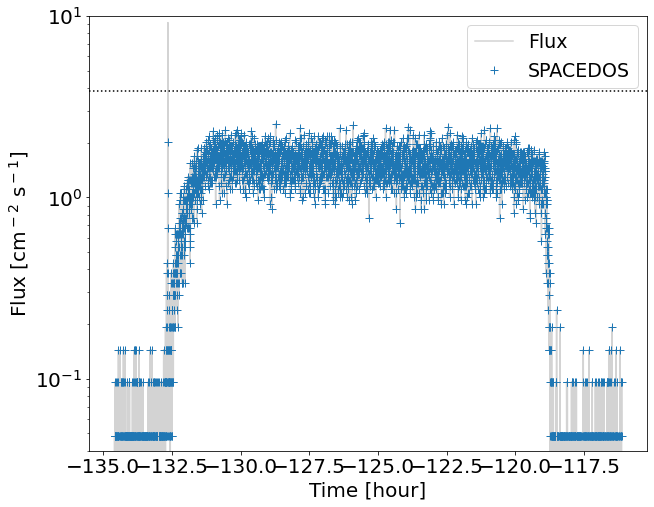

In [10]:
plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

rcc = rc.iloc[1000:6000].copy()
#rcc['time'] = pd.to_datetime(rcc.index * 11, unit='s')
rcc['time'] = (rcc.index -37431) * 13.3 /60/60
rcc = rcc.loc[rcc['time']<(21.5+133+4.5)]
rcc.set_index('time', inplace=True, drop=False)

plt.plot(rcc['sum']/10.4/2, c='lightgray', label='Flux')
plt.yscale('log')
plt.plot(rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['sum']/10.4/2, ms=8, marker='+', linestyle='', label='SPACEDOS')

plt.axhline(y = 500/10.4/2, color = 'black', linestyle = ':')
plt.axhline(y = 80/10.4/2, color = 'black', linestyle = ':')
#plt.axhline(y = 13/10.4/2, color = 'black', linestyle = ':')
#plt.axhline(y = 10/10.4/2, color = 'black', linestyle = ':')

plt.legend(fontsize=19)

plt.xlabel('Time [hour]')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
#plt.xlim(21.5,28.5)
#plt.xlim(21.5,21.5+133)
#plt.xlim([600000,601500])
#plt.xticks(rotation=45)
plt.ylim([0.04,10])

5000


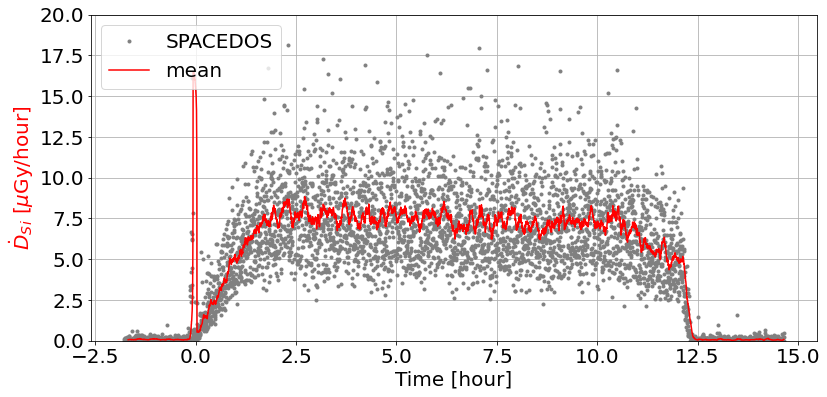

In [11]:
xx = rc[1000:6000].copy()
print(len(xx))

CHANNELS = 245
NOISE_LEVEL = 10
FROM_ENERGY = 0

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.105 #- 0.038/2
#xx = pd.DataFrame(spectra)
#xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(e.loc[2:CHANNELS+1,'ener'])).sum(axis=1)
xx['ener'] = ((xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener'])).sum(axis=1)
#xx['date'] = c_all.index
#xx['time'] = np.linspace(0, len(xx)*10.4, len(xx))
xx['time'] = xx[2]/60/60 - 5

plt.figure(figsize=(13, 6))
matplotlib.rcParams.update({'font.size': 20})

xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 # in uGy/day
xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))

xx['mean'] = xx['ddsi'].rolling(30).mean()


plt.plot( xx.time, xx['ddsi'], c='gray', linestyle='', marker='.', label='SPACEDOS')
plt.plot( xx.time, xx['mean'], c='red', label='mean')

plt.ylim([0,20])
#plt.yscale('log')

plt.xlabel('Time [hour]')
plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/hour]', color='red')
plt.legend(loc=2)
plt.grid()


xx.to_csv('spacedos_hemera.csv')

None